<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Torres, Nicole** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
<img src="logo.png" width=300 height=240 />
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```science_plots```: la función debe 

- utilizar como argumento de entrada la data descargada por ```download_pubmed```
- ordenar los conteos de autores por país en orden ascedente y 
- seleccionar los cinco más abundantes. Con esta selección debe graficar un ```pie_plot```. Como guía para el conteo por países puede usar el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). 

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [101]:
# Escriba aquí su código para el ejercicio 1

import Bio
from Bio.Seq import Seq
from Bio import Entrez
import re

def download_pubmed (keyword):
    """
    Funcion que pide como input la palabra de busqueda en tipo str del pubmed y como output guarda un documento con extensión
    txt que contiene los datos de la busqueda
    """ 
    Entrez.email = "nicole.torres@est.ikiam.edu.ec"
    handle = Entrez.esearch(db="pubmed", 
                        term=keyword+"[Title]",
                        usehistory="y")
    record = Entrez.read(handle)
    id_list = record["IdList"]
    webenv = record["WebEnv"]
    query_key = record["QueryKey"]
    handle = Entrez.efetch(db="pubmed",
                       rettype="medline", 
                       retmode="text", 
                       retstart=0,
                       retmax=543, 
                       webenv=webenv,
                       query_key=query_key)

    out_handle = open("data/"+keyword, "w")
    data = handle.read()
    handle.close()
    out_handle.write(data)
    out_handle.close()
    return id_list 

import re 
import matplotlib.pyplot as plt
from collections import Counter

def science_plots(data):
    """
    Funcion que pide como entrada la data de busqueda anterior y como resultado muestra un grafico tipo pastel que indica 
    a los cinco paises de origen de autores que presentaron mayor frecuencia. 
    """ 
    with open("data/"+data, errors="ignore") as l: 
        texto = l.read()
    texto = re.sub(r"\n\s{6}", " ", texto)
    countries_1 = re.findall (r"AD\s{2}-\s[A-Za-z].*,\s([A-Za-z]*)\.\s", texto)
    unique_countries = list(set(countries_1))
    conteo=Counter(countries_1)
    resultado={}
    for clave in conteo:  
        valor=conteo[clave]
        if valor > 1:
            resultado[clave] = valor
    ordenar = (sorted(resultado.values()))
    ordenar.sort(reverse=True)
    import operator
    pais = []
    contador = []
    
    reverse = sorted(resultado.items(), key=operator.itemgetter(1), reverse=True)   
    for name in enumerate(reverse):
        pais.append(name[1][0])
        contador.append(resultado[name[1][0]])
    five_p = pais[0:5] 
    five_c = contador [0:5]
    fig = plt.figure(figsize =(10, 7))
    plt.pie(five_c, labels = five_p)
    (plt.savefig("img/"+data, dpi=300, bbox_inches='tight'))
    plt.show()











In [106]:
import miningscience as msc 
help(download_pubmed)
help(science_plots)

Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Funcion que pide como input la palabra de busqueda en tipo str del pubmed y como output guarda un documento con extensión
    txt que contiene los datos de la busqueda

Help on function science_plots in module __main__:

science_plots(data)
    Funcion que pide como entrada la data de busqueda anterior y como resultado muestra un grafico tipo pastel que indica 
    a los cinco paises de origen de autores que presentaron mayor frecuencia.




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [90]:
# Escriba aquí su código para el ejercicio 2


file = download_pubmed ("Ecuador docking")
print ("El número articulos para Ecuador docking es: ", len(file))

file1 = (download_pubmed ("Ecuador CAS9"))
print ("El número articulos para Ecuador CAS9 es: ", len(file1))










El número articulos para Ecuador docking es:  14
El número articulos para Ecuador CAS9 es:  3


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```science_plots``` para: 

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta ```img```

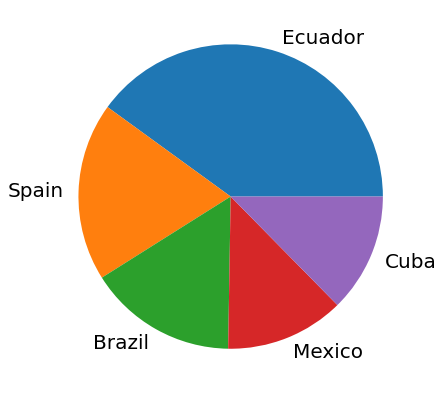

In [102]:
# Escriba aquí su código para el ejercicio 3

science_plots("Ecuador docking")









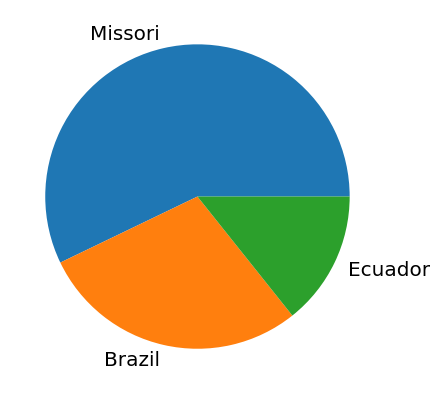

In [103]:
science_plots("Ecuador CAS9")

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*

### En el primer articulo se realizo la busqueda de ecuador docking. En los cuales se obtuvieron unicamente 14 resultados. Esto resultados eran los esperados, dado que el docking es una herramienta bioinformatica utilizada en el desarrollo de farmacos, la cual es una area no explorada. Ecuador fue el pais que mas aparecio debido a la busqueda especifica seguido de paises de habla hispana, tales como España, Brazil, Mexico y Cuba.

### En la segunda busqueda se utilizo a la proteina CAS9, la cual se utiliza principalmente en la tecnica de edicion genomica CRISPR/CAS. La presencia de pocos paises es debido a que existen restricciones acerca de la edicion genomica en el ecuador, por lo tanto es una herramienta utilizada muy poco o nula. 


.

.

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [46]:
# Escriba aquí su código para el ejercicio 6
# cargar data multiple y crear alineamientos
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
# cargar biopython o sus módulo, funciones
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

#f = open ("sequence.seq", "r")
with open("sequence.seq") as f:
    data = f.readlines()[0:15]
#print (data)
out_sequence = open("secuencias.fasta", "w")
for linea in data:  
    Entrez.email="nicole.torres@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()


In [47]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal")
print(ClustalAlign)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias.fasta
Alignment with 15 rows and 2903 columns
--------------------------------------------...--- DM010757.1
--------------------------------------------...--- DM010754.1
--------------------------------------------...TTT XM_048905541.1
--------------------------------------------...TTT XM_048905539.1
--------------------------------------------...TTT XM_048905540.1
--------------------------------------------...--- DM010756.1
--------------------------------------------...--- DM010760.1
--------------------------------------------...--- DM010758.1
ATGGGTGCAGCGCAATTCCGGCATATTTTCCTCCAGCCTCTCCA...--- XM_048959622.1
--------------------------------------------...--- DM010753.1
--------------------------------------------...--- DM010761.1
--------------------------------------------...--- DM010759.1
--------------------------------------------...--- DM010755.1
--------------------------------------------...--- XM_048864284.

In [ ]:
from Bio import Phylo
tree = Phylo.read("secuencias.dnd", "newick")

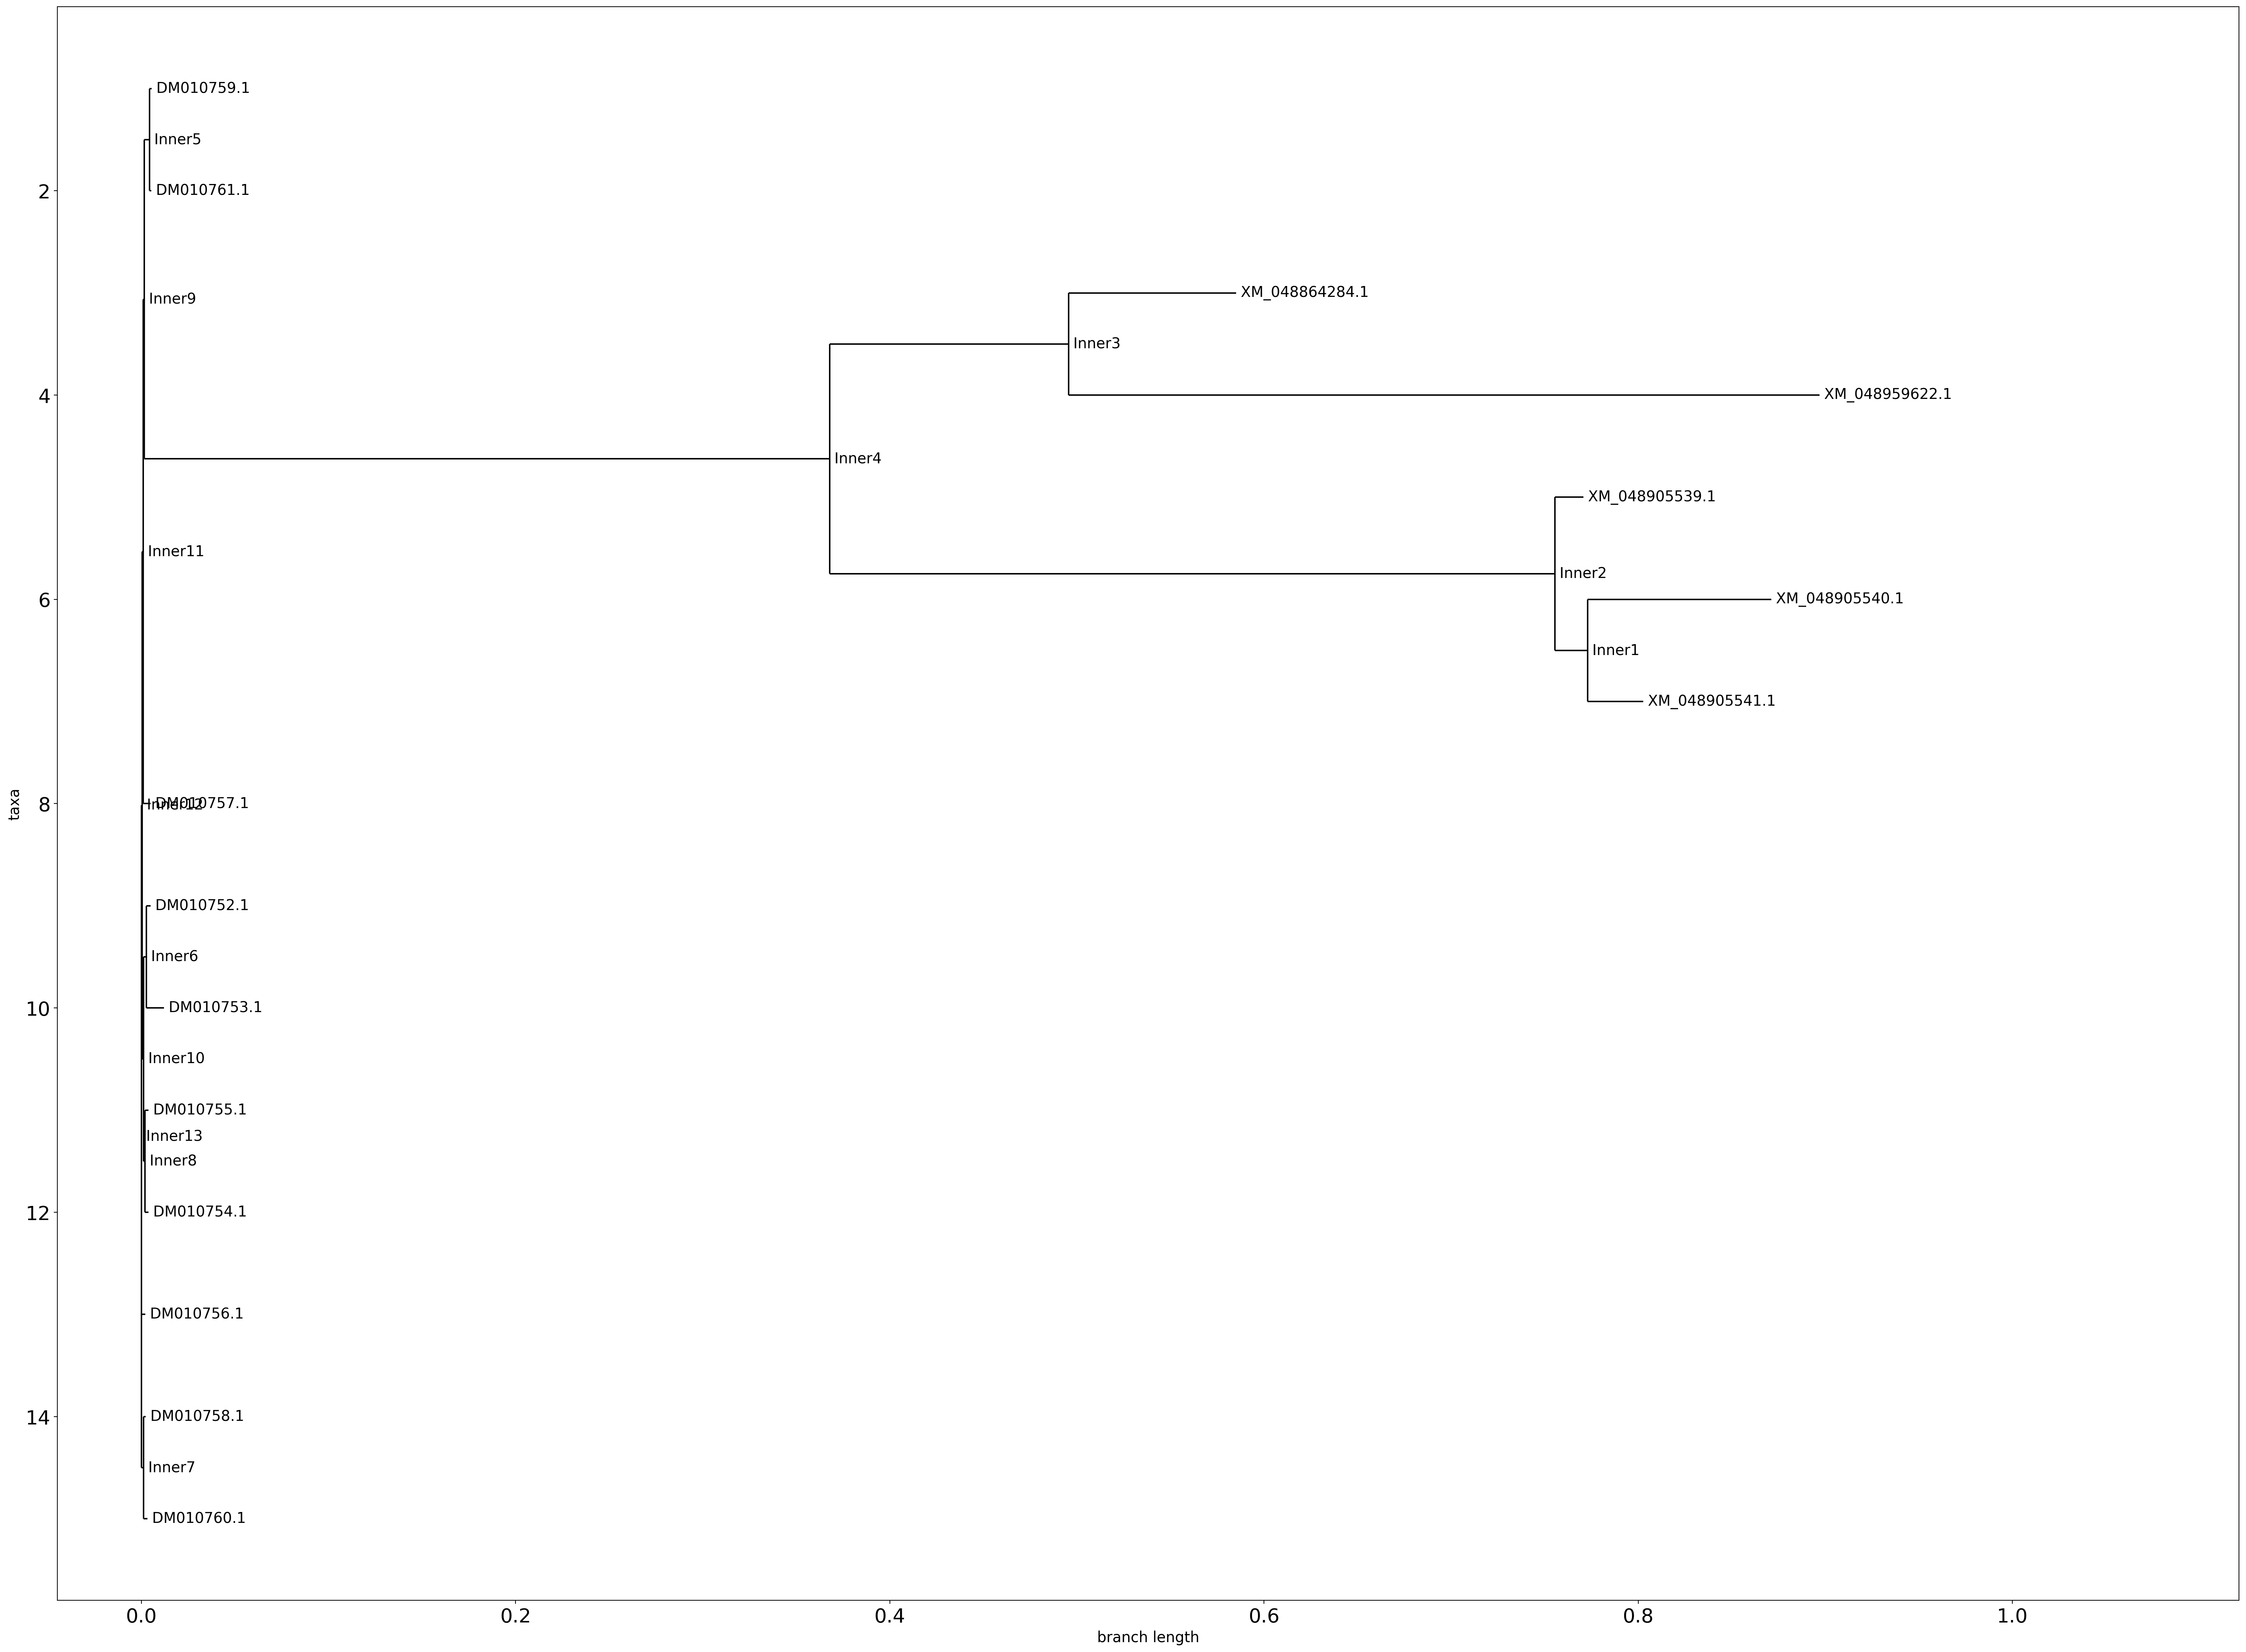

In [42]:
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
cis_tree = constructor.build_tree(alignment)
cis_tree.rooted = True
Phylo.write(cis_tree, "arbol.xml", "phyloxml")

cis_tree = Phylo.read(file="arbol.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(40, 30), dpi=200) # create figure & set the size 
matplotlib.rc('font', size=15)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(cis_tree, axes=axes)
fig.savefig("img/cis_tree.jpg")

**Escriba aquí la interpretación del árbol**

### El gen utilizado de la ruta glucolitica fue cis-aconitate y fueron analizadas 15 secuencias. El arbol indica que existieron 7 clados distintos y que las secuencias XM_048905540.1 y XM_048905541.1 fueron las que presentaron mayor similitud debido a que puede ser porque provienen de un mismo organismo. 

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
